# MOW 323 - Question 4

# Lanz Ebersohn
# u18285229

In [1]:
import numpy as np 
import scipy.optimize as sciopt
import matplotlib.pyplot as plt

# Supplementary code is provided here that was made available during class. You do not have to use it. You can overwrite it with your own code. 

In [2]:

def plot_four_bar_linkage(dictionary_output):

    def plot_vector(x_s,x_e,col,label=None):
        plt.plot([x_s[0],x_e[0]],[x_s[1],x_e[1]],col,label=label)    
    
    xA = dictionary_output["xA"]
    xB = dictionary_output["xB"]
    yA = dictionary_output["yA"]
    yB = dictionary_output["yB"] 
    xO4 = dictionary_output["xO4"]
    yO4 = dictionary_output["yO4"]     
    
    plt.figure()
    plot_vector([0,0],[xA,yA],'bo-',label="Link 2")
    plot_vector([xA,yA],[xB,yB],'ro-',label="Link 3")
    plot_vector([xB,yB],[xO4,yO4],'ko-',label="Link 4")    
    plt.legend()

def plot_four_bar_linkage_loop(dictionary_output,fignum):

    def plot_vector(x_s,x_e,col,label=None):
        plt.plot([x_s[0],x_e[0]],[x_s[1],x_e[1]],col,label=label)    
    
    xA = dictionary_output["xA"]
    xB = dictionary_output["xB"]
    yA = dictionary_output["yA"]
    yB = dictionary_output["yB"] 
    xO4 = dictionary_output["xO4"]
    yO4 = dictionary_output["yO4"]     
    
    plt.figure(fignum)
    plot_vector([0,0],[xA,yA],'bo-',label="Link 2")
    plot_vector([xA,yA],[xB,yB],'ro-',label="Link 3")
    plot_vector([xB,yB],[xO4,yO4],'ko-',label="Link 4")    
    

def kinematics_four_bar_linkage_problem(theta2,       # We assume we know theta2
                       theta3_guess, # theta3 is unknown. This is the initial guess.
                       theta4_guess, # theta4 is unknown. This is the initial guess.
                       w2,           # We assume we know w2
                       alpha2,       # We assume we know alpha2
                       l1,           # Length of l1
                       l2,           # Length of l2
                       l3,           # Length of l3
                       l4):           # Length of l4

    def position_residual(theta1,theta2,theta3,theta4,l1,l2,l3,l4):     
        eq1 = l2 * np.cos(theta2) + l3 * np.cos(theta3) - l4 * np.cos(theta4) - l1 * np.cos(theta1)
        eq2 = l2 * np.sin(theta2) + l3 * np.sin(theta3) - l4 * np.sin(theta4) - l1 * np.sin(theta1)
        res = np.array([eq1,eq2])
        return res
    
    def solve_function(x):

        return position_residual(0,theta2,x[0],x[1],l1,l2,l3,l4)

    theta3,theta4 = sciopt.fsolve(solve_function,[theta3_guess,theta4_guess])

    xA,yA = np.cos(theta2)*l2 , np.sin(theta2)*l2
    xB,yB = xA + np.cos(theta3)*l3 , yA + np.sin(theta3)*l3
    xO4,yO4 = l1,0
    
    A = np.array([[-l3 * np.cos(theta3),l4*np.cos(theta4)],[-l3 * np.sin(theta3),l4*np.sin(theta4)]]) 
    b = l2 * np.array([np.cos(theta2),np.sin(theta2)]) * w2

    w3,w4 = np.linalg.solve(A,b)
    
    A_acc = np.array([[l3 * np.real(np.exp(1j * theta3) * 1j), -l4 * np.real(np.exp(1j * theta4) * 1j)],
                      [l3 * np.imag(np.exp(1j * theta3) * 1j), -l4 * np.imag(np.exp(1j * theta4) * 1j)]])

    b2 = np.array([np.real(l2 * (-np.exp(1j*theta2) * w2**2 + np.exp(1j*theta2) * 1j * alpha2)),
                   np.imag(l2 * (-np.exp(1j*theta2) * w2**2 + np.exp(1j*theta2) * 1j * alpha2))])

    b3 = np.array([np.real(l3 * (-np.exp(1j*theta3)*w3**2)),
                   np.imag(l3 * (-np.exp(1j*theta3)*w3**2))])

    b4 = np.array([np.real(-l4 * (-np.exp(1j*theta4)*w4**2)),
                   np.imag(-l4 * (-np.exp(1j*theta4)*w4**2))])
    
    b_acc = -b2 - b3 - b4

    alpha3,alpha4 = np.linalg.solve(A_acc,b_acc)
    
    return {"theta2": theta2,
            "theta3": theta3,
            "theta4": theta4,
            "alpha2": alpha2,
            "alpha3": alpha3, 
            "alpha4": alpha4,
            "w2": w2,
            "w3": w3, 
            "w4": w4,            
            "xA": xA,
            "xB": xB,
            "yA": yA,
            "yB": yB,            
            "xO4": xO4,
            "yO4": yO4,
            "l1": l1,
            "l2": l2,
            "l3": l3,
            "l4": l4}

# Supplementary code is provided here that was made available during class. You do not have to use it. You can overwrite it with your own code. 

In [3]:

def four_bar_linkage_kinetics(dictionary_kinematics, # Obtained from kinematics analysis                            
                              thetaG2, # Angle between A/O2 and G2/O2 [rad]
                              thetaG3, # Angle between B/A and G3/A [rad]
                              thetaG4, # Angle between B/O4 and G4/O4 [rad]
                              thetaE,
                              l_G2O2,
                              l_G3A,
                              l_EA,
                              l_G4O4,
                              m2, # Length of mass 2 [m]
                              m3, # Length of mass 3 [m]
                              m4, # Length of mass 4 [m]
                              Ig2, # Mass moment of inertia around G2 [kg.m^2]
                              Ig3, # Mass moment of inertia around G3 [kg.m^2]
                              Ig4, # Mass moment of inertia around G4 [kg.m^2]
                              fex, # External force applied to link 3 x-component [N]
                              fey, # External force applied to link 3 y-component [N]
                              T4): # External torque applied to link 4.
     
    theta2 = dictionary_kinematics["theta2"]
    theta3 = dictionary_kinematics["theta3"]
    theta4 = dictionary_kinematics["theta4"]
    
    alpha2 = dictionary_kinematics["alpha2"]
    alpha3 = dictionary_kinematics["alpha3"]
    alpha4 = dictionary_kinematics["alpha4"]

    w2 = dictionary_kinematics["w2"]
    w3 = dictionary_kinematics["w3"]
    w4 = dictionary_kinematics["w4"]
    
    l1 = dictionary_kinematics["l1"]
    l2 = dictionary_kinematics["l2"]
    l3 = dictionary_kinematics["l3"]
    l4 = dictionary_kinematics["l4"]    
    
    xO2 = 0 + 0j
    xA  = l2 * np.exp(1j * theta2)
    xB  = xA + l3 * np.exp(1j * theta3)
    xO4 = l1 + 0j

    xG2 = xO2 + l_G2O2 * np.exp(1j * (theta2 + thetaG2))

    xG3 = xA + l_G3A * np.exp(1j * (theta3 + thetaG3))

    xE  = xA + l_EA * np.exp(1j * (theta3 + thetaE))

    xG4 = xO4 + l_G4O4 * np.exp(1j * (theta4 + thetaG4))
    
    r_O2G2 = xO2 - xG2
    r_AG2  = xA  - xG2
    r_AG3  = xA  - xG3
    r_BG3  = xB  - xG3
    r_BG4  = xB  - xG4
    r_O4G4 = xO4 - xG4
    r_EG3   = xE  - xG3
    
    decompose_real_imag = lambda x: (np.real(x), np.imag(x))
    
    x_O2G,y_O2G = decompose_real_imag(r_O2G2)
    x_AG2,y_AG2 = decompose_real_imag(r_AG2)
    x_AG3,y_AG3 = decompose_real_imag(r_AG3)
    x_BG3,y_BG3 = decompose_real_imag(r_BG3)
    x_BG4,y_BG4 = decompose_real_imag(r_BG4)
    x_O4G4,y_O4G4 = decompose_real_imag(r_O4G4)
    x_EG3,y_EG3 = decompose_real_imag(r_EG3)
    
    alpha_g2 = float(alpha2)
    alpha_g3 = float(alpha3)
    alpha_g4 = float(alpha4)

    def linear_acceleration_of_point_P(aA,lPA,theta,omega,alpha,thetaP):

        aP = aA + lPA * np.exp(1j * (theta + thetaP)) * (-omega**2 + alpha * 1j)

        return aP 

    aG2 = linear_acceleration_of_point_P(0j,l_G2O2,theta2,w2,alpha2,thetaG2)

    aA = linear_acceleration_of_point_P(0j,l2,theta2,w2,alpha2,0)

    aG3 = linear_acceleration_of_point_P(aA,l_G3A,theta3,w3,alpha3,thetaG3)

    aG4 = linear_acceleration_of_point_P(0j,l_G4O4,theta4,w4,alpha4,thetaG4)

    a_G2x,a_G2y = decompose_real_imag(aG2)
    a_G3x,a_G3y = decompose_real_imag(aG3)
    a_G4x,a_G4y = decompose_real_imag(aG4)


    A_row1 = [1,0,1,0,0,0,0,0,0]
    A_row2 = [0,1,0,1,0,0,0,0,0]
    A_row3 = [-y_O2G,x_O2G,-y_AG2,x_AG2,0,0,0,0,1]
    A_row4 = [0,0,-1,0,1,0,0,0,0]
    A_row5 = [0,0,0,-1,0,1,0,0,0]
    A_row6 = [0,0,y_AG3,-x_AG3,-y_BG3,x_BG3,0,0,0]
    A_row7 = [0,0,0,0,-1,0,1,0,0]
    A_row8 = [0,0,0,0,0,-1,0,1,0]
    A_row9 = [0,0,0,0,y_BG4,-x_BG4,-y_O4G4,x_O4G4,0]

    A_matrix = np.array([A_row1,A_row2,A_row3,A_row4,A_row5,A_row6,A_row7,A_row8,A_row9])

    b_vector = np.array([
                         m2  * a_G2x,
                         m2  * a_G2y,
                         Ig2 * alpha_g2,
                         m3  * a_G3x - fex,
                         m3  * a_G3y - fey, 
                         Ig3 * alpha_g3 - (x_EG3 * fey - y_EG3 * fex),
                         m4  * a_G4x, 
                         m4  * a_G4y,     
                         Ig4 * alpha_g4 - T4,
                        ])

    x = np.linalg.solve(A_matrix,b_vector)
    

    dict_output = {}
    labels = ["fO2x","fO2y","fA2x","fA2y","fB3x","fB3y","fO4x","fO4y","T2"]
    for i,j in zip(labels,x):
        dict_output[i] = float(j)
        
    dict_output["T4"] = T4
    dict_output["theta2"] = theta2
    dict_output["theta3"] = theta3
    dict_output["theta4"] = theta4
    dict_output["w2"] = w2
    dict_output["w3"] = w3
    dict_output["w4"] = w4    
    
    dict_output["alpha2"] = alpha2
    dict_output["alpha3"] =  alpha3
    dict_output["alpha4"] =  alpha4    
    
    return dict_output

# **Part A**

## (a)

No, since it is stated that the rotational speeds of the system will be very large it is sugested that accelerating massses will have a very large impact on the produced forces.
My first instinct says that Material B would be better as it will produce 4 times less forces IF the same geometry is used, note the problem wont be linear as the geometries will differ so my intuition may be wrong. The recomendation will be to calculate the required geometry for both materials, and select the Lowest mass option if no other requirements are given like cost.

# **Part B**

## Parameters

### Lengths of the links: (All lengths are given in metres  or [m]. ) 

In [4]:
l1 = 0.4 # Length of link 1 (O2-O4) in metres
l2 = 0.2 # Length of link 2 in metres
l3 = 0.31 # Length of link 3 in metres
l4 = 0.3 # Length of link 4 in metres

### Masses of the links in kg

In [5]:
m2 = 0.054 # Mass of link 1 in kg.
m3 = 0.083 # Mass of link 1 in kg.
m4 = 0.081 # Mass of link 2 in kg.

### Mass moment of inertia of the links around the centre of gravity in kg/m$^3$:

In [6]:
Ig2 = 0.0001800  # Mass moment of inertia of link 2 around its CG in kg.m^2
Ig3 = 0.0006700  # Mass moment of inertia of link 3 around its CG in kg.m^2
Ig4 = 0.0006075  # Mass moment of inertia of link 4 around its CG in kg.m^2

<span style="color:red">

### NB:
### The centre of gravity is located at the centre of each link, along the centre line that connects the two nodes of the links.
    
</span>
    

## (b)

In [7]:
theta2 = 0

theta3 = np.pi/4
theta4 = 3*np.pi/4

w2 = +0.5
alpha2 =0

theta_vector = []
w_vector = []
alpha_vector = []


dictkin = kinematics_four_bar_linkage_problem(theta2,       # We assume we know theta2
                        theta3, # theta3 is unknown. This is the initial guess.
                        theta4, # theta4 is unknown. This is the initial guess.
                        w2,           # We assume we know w2
                        alpha2,       # We assume we know alpha2
                        l1,           # Length of l1
                        l2,           # Length of l2
                        l3,           # Length of l3
                        l4)           # Length of l4

theta3 = dictkin["theta3"]
theta4 = dictkin["theta4"]
w3 = dictkin["w3"]
w4 = dictkin["w4"]
alpha3 = dictkin["alpha3"]
alpha4 = dictkin["alpha4"]


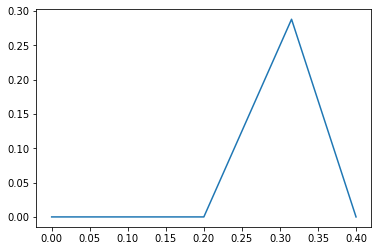

theta3[rads]:
1.189876854881888
we can see from inspection that the 4bar link is in the correct location and orienttaiton 


In [8]:
xpos = [0, dictkin['xA'],dictkin['xB'],dictkin['xO4']]
ypos = [0, dictkin['yA'],dictkin['yB'],dictkin['yO4']]

plt.figure()
plt.plot(xpos,ypos)
plt.show()


print("theta3[rads]:")
print(theta3)



print('we can see from inspection that the 4bar link is in the correct location and orienttaiton ')

You can write text in this cell. 

You can write text in this cell. 

## (c)

In [9]:
import numpy as np
print('Xvelocity of pointB[m/s]:')
print(-dictkin["w4"]*dictkin["l4"]*np.sin(dictkin["theta4"]))
print('This will be to the right')


Xvelocity of pointB[m/s]:
0.14389009477723133
This will be to the right


You can write text in this cell. 

## (d)

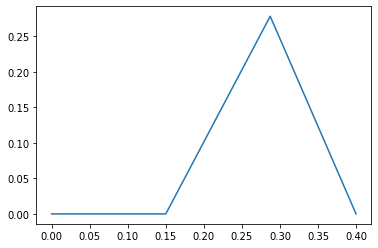

In [10]:
l22 = l2 - 0.05

theta2 = 0

theta3 = np.pi/4
theta4 = 3*np.pi/4

w2 = +0.5
alpha2 =0

theta_vector = []
w_vector = []
alpha_vector = []


dictkin2 = kinematics_four_bar_linkage_problem(theta2,       # We assume we know theta2
                        theta3, # theta3 is unknown. This is the initial guess.
                        theta4, # theta4 is unknown. This is the initial guess.
                        w2,           # We assume we know w2
                        alpha2,       # We assume we know alpha2
                        l1,           # Length of l1
                        l22,           # Length of l2
                        l3,           # Length of l3
                        l4)           # Length of l4


xpos = [0, dictkin2['xA'],dictkin2['xB'],dictkin2['xO4']]
ypos = [0, dictkin2['yA'],dictkin2['yB'],dictkin2['yO4']]

plt.figure()
plt.plot(xpos,ypos)
plt.show()

In [11]:
print('Initial angular acceleration of link 4:')
print(dictkin["alpha4"])

print('After change in l2 angular acceleration of link 4:')
print(dictkin2["alpha4"])

print(" difference:")
print(dictkin2["alpha4"]-dictkin["alpha4"])





Initial angular acceleration of link 4:
0.20023963459471375
After change in l2 angular acceleration of link 4:
0.11845205144334968
 difference:
-0.08178758315136407


You can write text in this cell. 

# **Part C**

## (e)

<span style="color:red">

### NB:
### The centre of gravity is located at the centre of each link, along the centre line that connects the two nodes of the links.
    
</span>
    

In [35]:
theta2v = np.linspace(0,2*np.pi,1000)


theta3 = np.pi/4
theta4 = 3*np.pi/4

w2 = +0.5
alpha2 =0

theta_vector = []
w_vector = []
alpha_vector = []

xss = []
yss = []

for theta2 in theta2v:

    dictkin = kinematics_four_bar_linkage_problem(theta2,       # We assume we know theta2
                           theta3, # theta3 is unknown. This is the initial guess.
                           theta4, # theta4 is unknown. This is the initial guess.
                           w2,           # We assume we know w2
                           alpha2,       # We assume we know alpha2
                           l1,           # Length of l1
                           l2,           # Length of l2
                           l3,           # Length of l3
                           l4)           # Length of l4

    theta3 = dictkin["theta3"]
    theta4 = dictkin["theta4"]
    w3 = dictkin["w3"]
    w4 = dictkin["w4"]
    alpha3 = dictkin["alpha3"]
    alpha4 = dictkin["alpha4"]
    
    thetaG2 = 0
    thetaG3 = 0
    thetaG4 = 0
    thetaE  = 0
    
    l_G2O2 = 0.09105
    l_G3A = 0.42824
    l_G4O4 = l4/2.0
    
    l_EA = 0
    
    T4 = calculate_T4(theta4)
    
    
    dictkinetic = four_bar_linkage_kinetics(dictkin, # Obtained from kinematics analysis                            
                                  thetaG2, # Angle between A/O2 and G2/O2 [rad]
                                  thetaG3, # Angle between B/A and G3/A [rad]
                                  thetaG4, # Angle between B/O4 and G4/O4 [rad]
                                  thetaE,
                                  l_G2O2,
                                  l_G3A,
                                  l_EA,
                                  l_G4O4,
                                  m2, # Length of mass 2 [m]
                                  m3, # Length of mass 3 [m]
                                  m4, # Length of mass 4 [m]
                                  Ig2, # Mass moment of inertia around G2 [kg.m^2]
                                  Ig3, # Mass moment of inertia around G3 [kg.m^2]
                                  Ig4, # Mass moment of inertia around G4 [kg.m^2]
                                  0, # External force applied to link 3 x-component [N]
                                  0, # External force applied to link 3 y-component [N]
                                  T4)    
    
    theta_vector.append([theta2,theta3,theta4])
    w_vector.append([w2,w3,w4])
    xss.append([0, dictkin['xA'],dictkin['xB'],dictkin['xO4']])
    yss.append([0, dictkin['yA'],dictkin['yB'],dictkin['yO4']])




theta2vec = np.array(theta_vector)[:,2]
print('The min and max of theta4 is:',min(theta2vec),'and',max(theta2vec),'rads respectively')

The min and max of theta4 is: 1.528700921335856 and 3.009208411529804 rads respectively


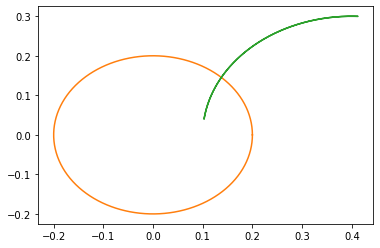

looks good


In [33]:
## checking model solutions:
plt.figure()
plt.plot(xss,yss)
plt.show()


print('looks good')


You can write text in this cell. 

## (f) The torque is given in N.m

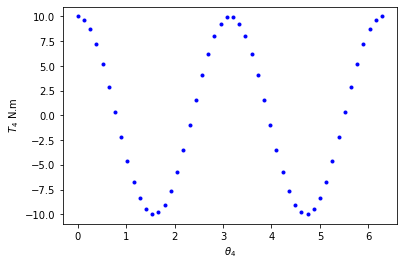

In [34]:
def calculate_T4(theta4_rad): 
    import numpy as np 
    return np.cos(theta4_rad * 2) * 10 # N.m

def plot_T4():
    theta4v = np.linspace(0,2*np.pi)
    
    for theta4 in theta4v:
        T4 = calculate_T4(theta4)
        plt.figure(1)
        plt.plot(theta4,T4,'b.')
    plt.xlabel(r"$\theta_{4}$")
    plt.ylabel("$T_{4}$ N.m")
plot_T4()

In [14]:
# You can code in this cell if necessary

You can write text in this cell. 